In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from io import BytesIO
import pandas_datareader.data as dat_aq
from datetime import datetime, timedelta

import rec_mod as rm
#recession data for comparison
sarec = rm.rec_periods('ZAFRECD')
sarec = sarec.astype(int)

D:\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


121
121


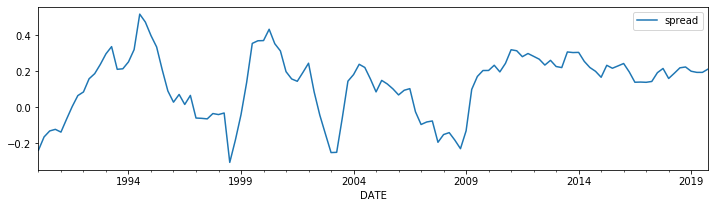

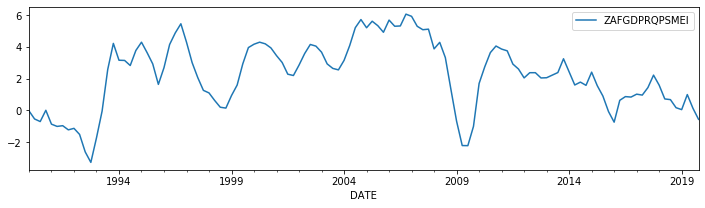

D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
D:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
D:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
D:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:            ZAFGDPRQPSMEI   No. Observations:                  116
Model:             MarkovAutoregression   Log Likelihood                -110.936
Date:                  Thu, 30 Apr 2020   AIC                            261.873
Time:                          17:08:34   BIC                            316.944
Sample:                      01-01-1990   HQIC                           284.229
                           - 10-01-2019                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9233      0.663      2.899      0.004       0.623       3.223
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8732      0.663      4.331      0.000       1.573       4.173
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3434      0.663      3.534      0.000       1.044       3.643
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.1284      0.022      5.919      0.000       0.086       0.171
ar.L1          2.2915      0.107     21.384      0.000       2.081       2.502
ar.L2         -2.3094      0.245     -9.421      0.000      -2.790      -1.829
ar.L3          1.2464      0.241      5.171      0.000       0.774       1.719
ar.L4         -0.2791      0.103     -2.713      0.007      -0.481      -0.077
                           Regime transition parameters                          
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
p[0->0].tvtp0     2.9542        nan        nan        nan         nan         nan
p[1->0].tvtp0    -5.0281      3.374     -1.490      0.136     -11.641       1.585
p[2->0].tvtp0    -0.3754      0.840     -0.447      0.655      -2.022       1.271
p[0->0].tvtp1    -1.2943        nan        nan        nan         nan         nan
p[1->0].tvtp1    -0.9736     16.610     -0.059      0.953     -33.528      31.581
p[2->0].tvtp1    -3.9139      3.941     -0.993      0.321     -11.637       3.810
p[0->1].tvtp0     0.2980        nan        nan        nan         nan         nan
p[1->1].tvtp0    -1.3276      0.738     -1.799      0.072      -2.774       0.119
p[2->1].tvtp0     0.5162      0.663      0.779      0.436      -0.783       1.815
p[0->1].tvtp1     2.7676        nan        nan        nan         nan         nan
p[1->1].tvtp1    -0.0557      3.545     -0.016      0.987      -7.004       6.892
p[2->1].tvtp1    -3.3836      2.770     -1.222      0.222      -8.812       2.045
===============

In [2]:
sa_gdp_chg = rm.pull_data('ZAFGDPRQPSMEI', 'fred', datetime(1989,10,1), datetime(2019,10,1), frequency='QS')
sa3m = rm.pull_data('IR3TTS01ZAM156N', 'fred', datetime(1989,10,1), datetime(2019,10,1), frequency='QS')
sa10y = rm.pull_data('IRLTLT01ZAM156N', 'fred', datetime(1989,10,1), datetime(2019,10,1), frequency='QS')
sa_spread = pd.DataFrame(sa10y.iloc[:,0] - sa3m.iloc[:,0], columns = ['spread'])
print(len(sa_gdp_chg))
print(len(sa_spread))

result, model = rm.SOP_Phase_1(sa_gdp_chg, 'Markov_Filardo', 3, 4, exog = sa_spread/10)
result.summary()

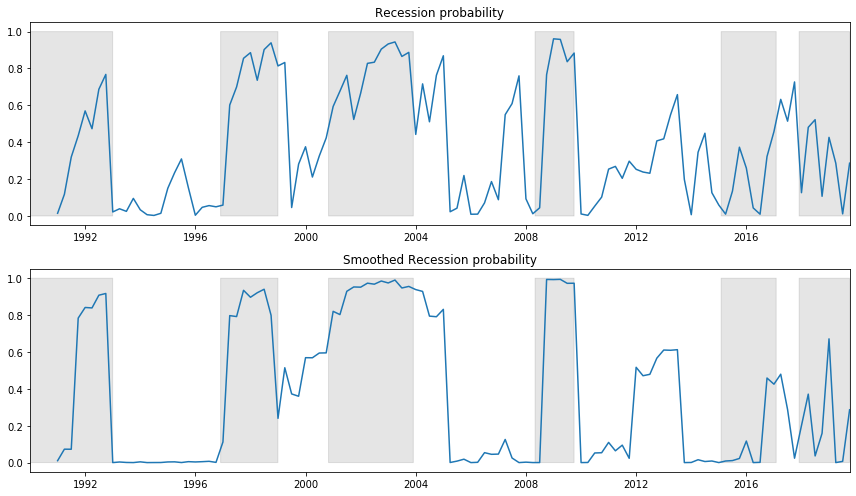

0.4703461812622262
precision =  2.1260935877408187
0.473791393371177
smooth_precision =  2.1106335277318586


In [3]:
rm.rec_prob_graph(result, sarec, datetime(1990,1,1), datetime(2019,10,1), invert = False)

In [4]:
result.expected_durations.dropna()[0].mean()

7.037102905683447